[FUENTE DE INFORMACION: DETECCION DE ENFERMEDAD DE LA TIROIDES - url: (https://archive.ics.uci.edu/ml/datasets/car+evaluation)](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)
1. [Estudiando el conjunto de Datos](#estudiando-los-datos)
    1. [Graficando las clases](#grafico-clases)
1. [Aplicando SMOTE](#aplicando-smote)

In [4]:
import pandas as pd
import category_encoders as ce 
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("car_evaluation.csv",header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
data=data.replace({"unacc":0,"acc":1, "good":1, "vgood":1})

In [8]:
def show(data):
  for i in data.columns[1:]:
    print("Atributo: {} con Niveles : {} ".format(i,data[i].unique()))

show(data)

Atributo: maint con Niveles : ['vhigh' 'high' 'med' 'low'] 
Atributo: doors con Niveles : ['2' '3' '4' '5more'] 
Atributo: persons con Niveles : ['2' '4' 'more'] 
Atributo: lug_boot con Niveles : ['small' 'med' 'big'] 
Atributo: safety con Niveles : ['low' 'med' 'high'] 
Atributo: class con Niveles : [0 1] 


In [9]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class        int64
dtype: object

In [10]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,0
1,1,1,1,1,1,2,0
2,1,1,1,1,1,3,0
3,1,1,1,1,2,1,0
4,1,1,1,1,2,2,0


In [11]:
for col in col_names:
    print(data[col].value_counts())  

1    432
2    432
3    432
4    432
Name: buying, dtype: int64
1    432
2    432
3    432
4    432
Name: maint, dtype: int64
1    432
2    432
3    432
4    432
Name: doors, dtype: int64
1    576
2    576
3    576
Name: persons, dtype: int64
1    576
2    576
3    576
Name: lug_boot, dtype: int64
1    576
2    576
3    576
Name: safety, dtype: int64
0    1210
1     518
Name: class, dtype: int64


In [12]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
data['class'].value_counts()

0    1210
1     518
Name: class, dtype: int64

In [14]:
X = data.drop(['class'], axis=1)

y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1157, 6)
(571, 6)


In [15]:
print("inaceptable: {}".format(len(y[y==0])))
print("aceptable: {}".format(len(y[y==1])))

inaceptable: 1210
aceptable: 518


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
clasifier.score(X_test,y_test)

0.9369527145359019

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[392   5]
 [ 31 143]]


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       397
           1       0.97      0.82      0.89       174

    accuracy                           0.94       571
   macro avg       0.95      0.90      0.92       571
weighted avg       0.94      0.94      0.94       571



In [20]:
import seaborn as sns

[Text(0, 0, '1210'), Text(0, 0, '518')]

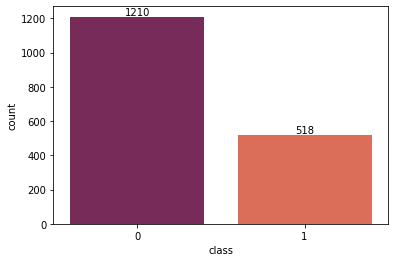

In [21]:
ax =  sns.countplot(x='class', data=data, palette='rocket')

abs_values = data['class'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)


In [33]:
import smote_variants as sv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [40]:
# oversampler= sv.SMOTE_TomekLinks()
# oversampler= sv.SMOTE_ENN()
oversampler= sv.SMOTE_IPF()
classifier= GaussianNB()
# classifier= RandomForestClassifier(random_state=42)
model= Pipeline([
                ('scale', StandardScaler()),
                ('clf', sv.OversamplingClassifier(oversampler, classifier))
            ])
model.fit(X_train, y_train)
param_grid= {'clf__oversampler':[sv.distance_SMOTE(proportion=0.2),
                                 sv.distance_SMOTE(proportion=0.3),
                                 sv.distance_SMOTE(proportion=0.4),
                                 sv.distance_SMOTE(proportion=0.5),
                                 sv.distance_SMOTE(proportion=0.6),
                                 sv.distance_SMOTE(proportion=0.7),
                                 sv.distance_SMOTE(proportion=0.8),
                                 sv.distance_SMOTE(proportion=0.9),
                                 sv.distance_SMOTE(proportion=1.0)]}
param_grid['clf__oversampler']

2022-05-15 00:01:29,763:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-05-15 00:01:29,764:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-05-15 00:01:29,799:INFO:SMOTE_IPF: Removing 0 elements
2022-05-15 00:01:29,836:INFO:SMOTE_IPF: Removing 0 elements
2022-05-15 00:01:29,860:INFO:SMOTE_IPF: Removing 0 elements


In [41]:
scoring = {"recall": "recall", "precision": "precision", "f1" : "f1"}
grid= GridSearchCV(model, param_grid= param_grid, cv= 3, n_jobs= 1, verbose= 2, scoring= scoring, refit='recall' ) #probar con lista ['f1','recall','precision']
grid.fit(X_train, y_train)

2022-05-15 00:01:31,112:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,133:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,149:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,167:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,190:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,220:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,240:INFO:dista

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 

2022-05-15 00:01:31,311:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,332:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,355:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,376:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,405:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,434:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,458:INFO:dista

[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf_

2022-05-15 00:01:31,521:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,550:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,583:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,612:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,638:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,673:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-05-15 00:01:31,704:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,735:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,773:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,807:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-15 00:01:31,841:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_IPF object at 0x000001BE0D6D89D0>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001BE0D6D8D30>,
                                              <smote_variants._smote_va...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001BE0E74E950>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)

In [42]:
datos = {'Recall' : grid.cv_results_['mean_test_recall'],
         'Precision' : grid.cv_results_['mean_test_precision'],
         'F1' : grid.cv_results_['mean_test_f1']}

df = pd.DataFrame(datos)

print(grid.get_params)
df

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_IPF object at 0x000001BE0D6D89D0>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001BE0D6D8D30>,
                                              <smote_variants._smote_va...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001BE0E74E950>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)>


,Recall,Precision,F1
0,0.802390,0.872686,0.835089
1,0.805339,0.854204,0.827985
2,0.854691,0.856800,0.854853
3,0.860463,0.850768,0.854448
4,0.880854,0.843915,0.860785
5,0.889601,0.834823,0.860794
6,0.898322,0.821452,0.857417
7,0.918637,0.828207,0.870695
8,0.912815,0.813065,0.859496


In [47]:
y_sinSmote = y.to_numpy()
print('majority class: %d' % np.sum(y_sinSmote == 0))
print('minority class: %d' % np.sum(y_sinSmote == 1))

majority class: 1210
minority class: 518


In [48]:
oversampler= sv.distance_SMOTE(proportion=0.7)
X_samp, y_samp= oversampler.sample(X.to_numpy(), y.to_numpy())

2022-05-15 00:50:35,785:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [49]:
import numpy as np


In [50]:
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 1210
minority class: 1002


In [61]:
dfSmote = pd.DataFrame(X_samp)
dfSmote = dfSmote.assign(col_class = y_samp)
dfSmote

,0,1,2,3,4,5,col_class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0
3,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0
...,...,...,...,...,...,...,...
2207,1.000000,4.000000,3.000000,2.039593,2.960407,2.960407,1
2208,1.060145,3.939855,3.939855,2.939855,3.000000,2.060145,1
2209,1.829764,3.829764,2.170236,2.829764,1.170236,3.000000,1
2210,1.892811,3.892811,3.000000,2.892811,1.000000,3.000000,1


In [62]:
dfSmote

,0,1,2,3,4,5,col_class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0
3,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0
...,...,...,...,...,...,...,...
2207,1.000000,4.000000,3.000000,2.039593,2.960407,2.960407,1
2208,1.060145,3.939855,3.939855,2.939855,3.000000,2.060145,1
2209,1.829764,3.829764,2.170236,2.829764,1.170236,3.000000,1
2210,1.892811,3.892811,3.000000,2.892811,1.000000,3.000000,1


[Text(0, 0, '1210'), Text(0, 0, '1002')]

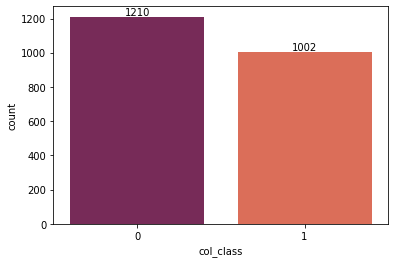

In [63]:
ax =  sns.countplot(x='col_class', data=dfSmote, palette='rocket')

abs_values = dfSmote['col_class'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[382  21]
 [  0 327]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       403
           1       0.94      1.00      0.97       327

    accuracy                           0.97       730
   macro avg       0.97      0.97      0.97       730
weighted avg       0.97      0.97      0.97       730

